# Simple Machine Learning Example

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [88]:
# get data
housing = fetch_california_housing()
features = housing["data"]
feature_names = housing["feature_names"]
labels = housing["target"]

In [89]:
# create dataframe
df = pd.DataFrame(features)
df.columns = feature_names 
df["VALUE"] = labels * 100_000
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,VALUE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [90]:
# split into training and testing data
X = df.drop(columns=["VALUE"])
y = df["VALUE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [91]:
# fit a model on training data
classifier = RandomForestRegressor(n_estimators=500)
classifier.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [92]:
# predict on testing data
predictions = classifier.predict(X_test)

In [93]:
# show results
results = X_test
results["ACTUAL_VALUE"] = y_test
results["PREDICTED_VALUE"] = predictions
results["ERROR"] = abs(results["ACTUAL_VALUE"] - results["PREDICTED_VALUE"])
results = results.sort_values(by="ACTUAL_VALUE").reset_index()
results

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ACTUAL_VALUE,PREDICTED_VALUE,ERROR
0,2521,1.6607,16.0,6.710526,1.921053,85.0,2.236842,39.71,-122.74,14999.0,97753.986,95206.99
1,14326,1.0918,52.0,2.253333,1.202667,1230.0,3.280000,32.71,-117.16,22500.0,150927.208,113486.00
2,19801,1.7969,10.0,7.448980,2.081633,140.0,2.857143,40.40,-123.08,37500.0,82191.398,44285.01
3,2985,1.5429,42.0,5.258216,1.197183,677.0,3.178404,35.33,-119.01,39400.0,58575.000,21576.00
4,3137,1.9107,36.0,4.912863,1.311203,672.0,2.788382,35.00,-117.65,39800.0,78234.796,36729.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2059,5255,8.5153,40.0,6.407266,0.925430,1564.0,2.990440,34.07,-118.48,500001.0,472816.560,23807.46
2060,5265,8.5650,33.0,6.442966,1.038023,2540.0,2.414449,34.05,-118.54,500001.0,490086.794,4557.15
2061,17237,3.8456,27.0,5.627171,1.081716,2591.0,2.646578,34.43,-119.66,500001.0,295999.006,213646.99
2062,14487,5.1023,25.0,5.833667,1.068136,1137.0,2.278557,32.86,-117.25,500001.0,348576.342,146897.77


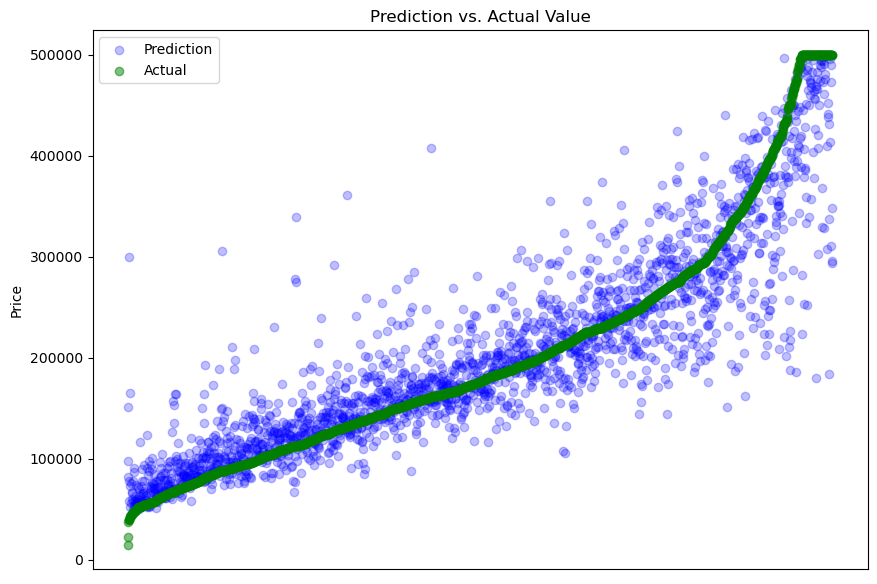

In [97]:
# plot results
plt.figure(figsize=[10,7])
plt.scatter(results.index, results.PREDICTED_VALUE, color='blue', alpha=0.25)
plt.scatter(results.index, results.ACTUAL_VALUE, color='green', alpha=0.5)
plt.title("Prediction vs. Actual Value")
plt.legend(['Prediction','Actual'])
plt.ylabel("Price")
ax = plt.gca()
ax.get_xaxis().set_visible(False)